This is a python-data analysis notebook which records some important codes.

In [1]:
import numpy as np 
from pandas import Series,DataFrame
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from pandasgui import show
%matplotlib inline

In [2]:
sns.set(style='whitegrid',palette="muted",color_codes=True)
sns.despine(left=True,bottom=True)
sns.set(color_codes=True)

<Figure size 432x288 with 0 Axes>

2020/10/26:数据分组与聚合运算

In [3]:
tips=pd.read_csv('tips.csv')

In [4]:
tips.groupby('sex')['tip']
# groupby方法生成了一个groupby对象，是可迭代类型(name,group)

In [5]:
tips.groupby('sex').mean()
# count,sum,mean,median,std,var,min,max,prod,first,last

,total_bill,tip,size
sex,,,
Female,18.056897,2.833448,2.459770
Male,20.744076,3.089618,2.630573


In [6]:
def get_range(x):
    return x.max()-x.min()
tips_range=tips.groupby('sex')['tip'].agg(get_range)
tips_range

sex
Female    5.5
Male      9.0
Name: tip, dtype: float64

In [7]:
# numpy库中的argsort()函数：
arr=np.array([1,3,8,4,32,6,7])
arr_index=np.argsort(arr)
arr[arr_index]

array([ 1,  3,  4,  6,  7,  8, 32])

2020/10/27:分组运算与数据透视表

In [8]:
# transform方法
tips.groupby('sex')['tip'].transform('mean')

0      2.833448
1      3.089618
2      3.089618
3      3.089618
4      2.833448
         ...   
239    3.089618
240    2.833448
241    3.089618
242    3.089618
243    2.833448
Name: tip, Length: 244, dtype: float64

In [9]:
# apply方法
def top(x,n=5):
    return x.sort_values(by='tip',ascending=False)[-n:]
tips.groupby('sex').apply(top)

total_bill   tip     sex smoker  day    time  size
sex                                                           
Female 215       12.90  1.10  Female    Yes  Sat  Dinner     2
       0         16.99  1.01  Female     No  Sun  Dinner     2
       111        7.25  1.00  Female     No  Sat  Dinner     1
       67         3.07  1.00  Female    Yes  Sat  Dinner     1
       92         5.75  1.00  Female    Yes  Fri  Dinner     2
Male   43         9.68  1.32    Male     No  Sun  Dinner     2
       235       10.07  1.25    Male     No  Sat  Dinner     2
       75        10.51  1.25    Male     No  Sat  Dinner     2
       237       32.83  1.17    Male    Yes  Sat  Dinner     2
       236       12.60  1.00    Male    Yes  Sat  Dinner     2

In [10]:
# pivot_table函数,默认调用函数为mean()
tips.pivot_table(values='tip',index='sex',columns='smoker',aggfunc='sum',margins=True)

smoker,No,Yes,All
sex,,,
Female,149.77,96.74,246.51
Male,302.00,183.07,485.07
All,451.77,279.81,731.58


In [11]:
# 交叉表：分组计算频率
cross_table=pd.crosstab(index=tips['day'],columns=tips['size'])
cross_table

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [12]:
cross_table.div(cross_table.sum(1),axis=0)

size,1,2,3,4,5,6
day,,,,,,
Fri,0.052632,0.842105,0.052632,0.052632,0.000000,0.000000
Sat,0.022989,0.609195,0.206897,0.149425,0.011494,0.000000
Sun,0.000000,0.513158,0.197368,0.236842,0.039474,0.013158
Thur,0.016129,0.774194,0.064516,0.080645,0.016129,0.048387


2020/11/08:matplotlib可视化

In [13]:
data={
    'name':['张三','李四','王五','小明'],
    'sex':['female','female','male','male'],
    'math':[78,79,83,92],
    'city':['北京','上海','广州','北京']
}
df=pd.DataFrame(data)

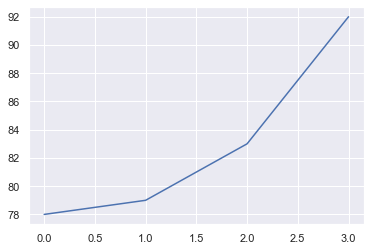

In [14]:
# 线型图
plt.plot(df.index,df['math'])

<BarContainer object of 5 artists>

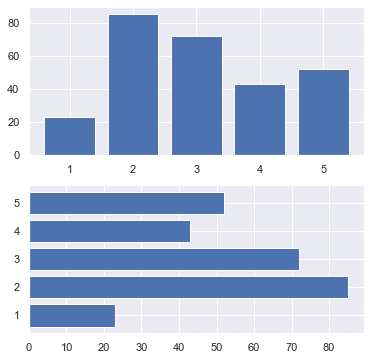

In [15]:
# 柱状图
fig,axes=plt.subplots(2,1,figsize=(6,6))
data=[23,85,72,43,52]
axes[0].bar([1,2,3,4,5],data)
axes[1].barh([1,2,3,4,5],data)

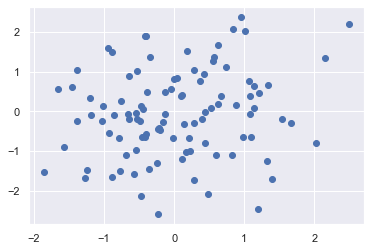

In [16]:
# 散点图
X=np.random.randn(100)
Y=np.random.randn(100)
plt.scatter(X,Y)

(array([1., 0., 4., 2., 3., 4., 7., 5., 5., 6., 5., 5., 5., 7., 4., 6., 7.,
        5., 4., 1., 2., 3., 0., 2., 0., 2., 3., 0., 1., 1.]),
 array([-1.77115533, -1.6300694 , -1.48898347, -1.34789753, -1.2068116 ,
        -1.06572566, -0.92463973, -0.7835538 , -0.64246786, -0.50138193,
        -0.360296  , -0.21921006, -0.07812413,  0.0629618 ,  0.20404774,
         0.34513367,  0.48621961,  0.62730554,  0.76839147,  0.90947741,
         1.05056334,  1.19164927,  1.33273521,  1.47382114,  1.61490707,
         1.75599301,  1.89707894,  2.03816487,  2.17925081,  2.32033674,
         2.46142268]),
 <a list of 30 Patch objects>)

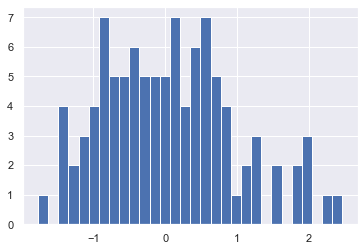

In [17]:
# 直方图
x=np.random.normal(size=100)
plt.hist(x,bins=30)

2020/11/14:最小二乘法

In [18]:
def linear_regression(x, y):  
    N = len(x) 
    sumx = sum(x) 
    sumy = sum(y) 
    sumx2 = sum(x**2) 
    sumxy = sum(x*y) 

    A = np.mat([[N, sumx], [sumx, sumx2]]) 
    b = np.array([sumy, sumxy]) 

    return np.linalg.solve(A, b)
# a0, a1 = linear_regression(x,y)
# y = a0 + a1*x

2020/11/15:seaborn可视化

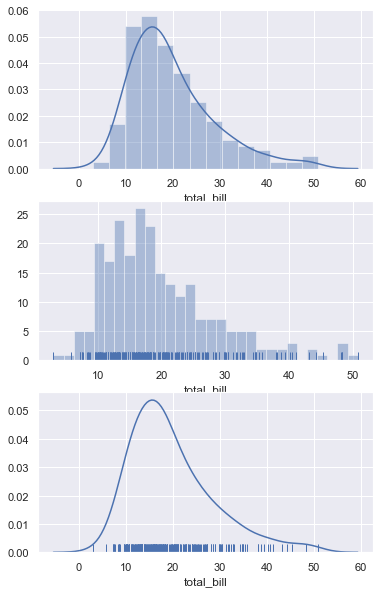

In [19]:
# 单变量分布图
fig,axes=plt.subplots(3,1,figsize=(6,10))
sns.distplot(tips['total_bill'],ax=axes[0])
sns.distplot(tips['total_bill'],ax=axes[1],bins=30,kde=False,rug=True)
sns.distplot(tips['total_bill'],ax=axes[2],hist=False,rug=True)

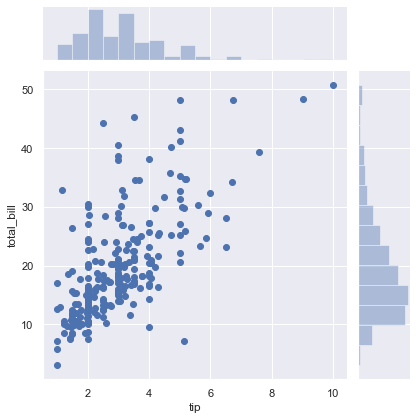

In [20]:
# 多变量分布图
sns.jointplot(x='tip',y='total_bill',data=tips)

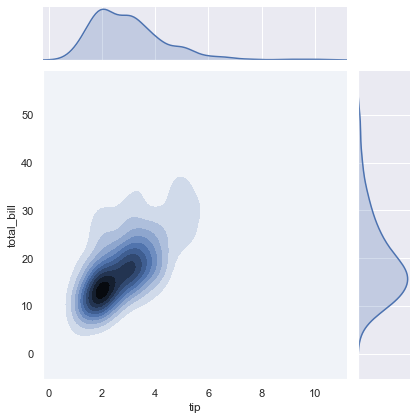

In [21]:
sns.jointplot(x='tip',y='total_bill',data=tips,kind='kde')

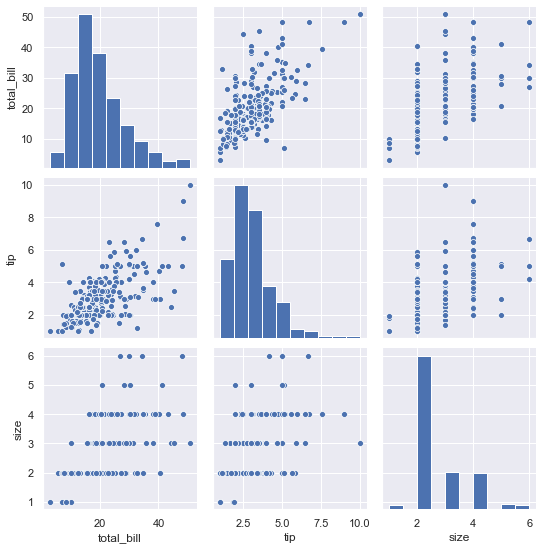

In [22]:
sns.pairplot(tips)

2020/11/30:seaborn绘制分类图与柱状图

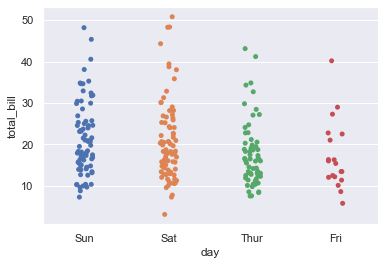

In [23]:
# 分类散点图
sns.stripplot(x='day',y='total_bill',data=tips)

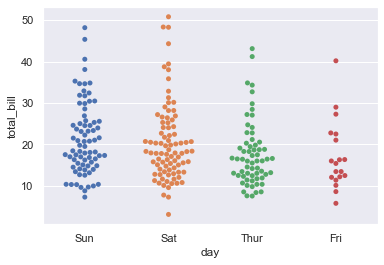

In [25]:
sns.swarmplot(x='day',y='total_bill',data=tips)

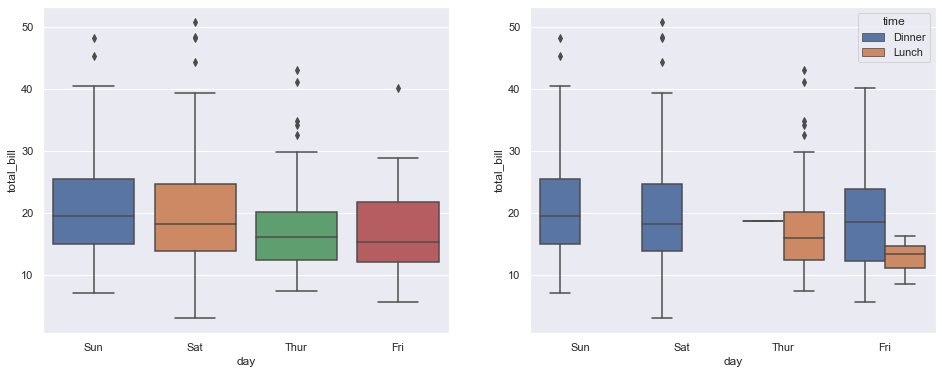

In [31]:
# 箱线图与琴形图
fig,axes=plt.subplots(1,2,figsize=(16,6))
sns.boxplot(x='day',y='total_bill',data=tips,ax=axes[0])
sns.boxplot(x='day',y='total_bill',data=tips,hue='time',ax=axes[1])

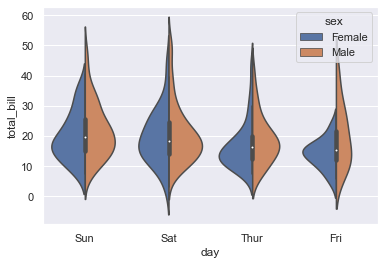

In [35]:
sns.violinplot(x='day',y='total_bill',hue='sex',split=True,data=tips)

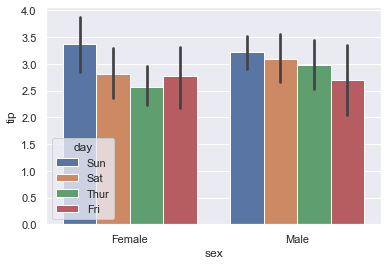

In [37]:
# 柱状图
sns.barplot(x='sex',y='tip',hue='day',data=tips)

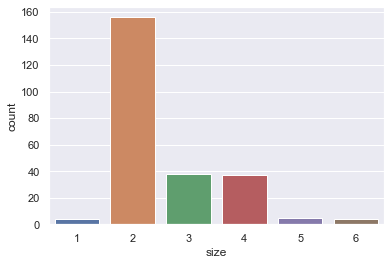

In [38]:
sns.countplot(x='size',data=tips)

回归图与网格

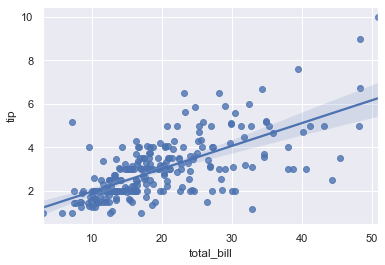

In [41]:
sns.regplot(x='total_bill',y='tip',data=tips)

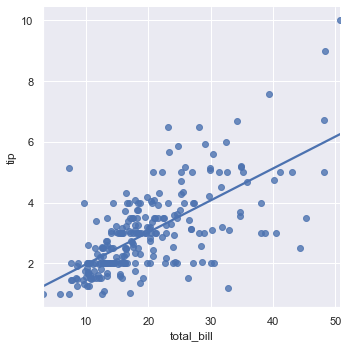

In [43]:
sns.lmplot(x='total_bill',y='tip',data=tips,ci=None)

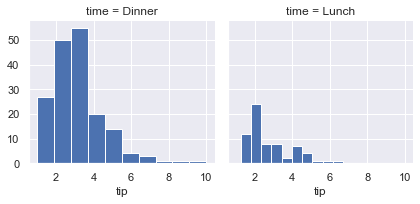

In [44]:
g=sns.FacetGrid(tips,col='time')
g.map(plt.hist,'tip')

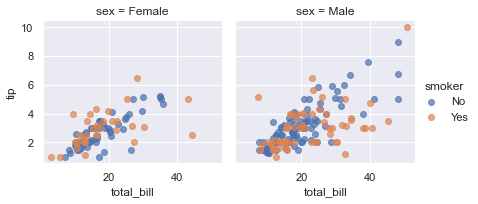

In [46]:
g=sns.FacetGrid(tips,col='sex',hue='smoker')
g.map(plt.scatter,'total_bill','tip',alpha=0.7)
g.add_legend()

2020/12/24:
* pandasgui的使用

In [2]:
show(tips)

NameError: name 'tips' is not defined